# Introduction to Matplotlib. Part 2

Welcome back. This is the second part of the Data Visualization with Matplotlib Workshop. Last time we learned the basics of how matplotlib works. Today, we will be focusing on applying those basics concepts to create different kinds of plots. We will be focusing on

 - Scatter plots 
 - Lines with Errors
 - Histograms
 - Barplots
 - Pictures (like photographs)
 - Heatmaps
 - Contour plots

Lot of ground to cover, but you will see that the basic syntax is always the same.

We will mostly be using the Baby Name Dataset introduced yesterday. As a reminder, it shows the number of newborns with a given name in each year starting from 1965. Let's load the data and start.

In [3]:
import pandas as pd
import numpy as np

# Read the name data from a csv
#names = pd.read_csv('national_reduced.csv')
name_data_url = r'https://raw.githubusercontent.com/non87/Matplotlib-Workshop/master/national_reduced.csv?token=AFYWZVENRVVF2JPOG6XTWFK7ELZA4'
names = pd.read_csv(name_data_url)
# Look at the column names and data type
print(f'{names.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192014 entries, 0 to 1192013
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1192014 non-null  int64 
 1   Id          1192014 non-null  int64 
 2   Name        1192014 non-null  object
 3   Year        1192014 non-null  int64 
 4   Gender      1192014 non-null  object
 5   Count       1192014 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 54.6+ MB
None


### Scatter Plots (and Their Parameters)

Using the definition of _scatter plot_ that Google suggests, "A scatter plot uses dots to represent values for two different numeric variables". They are mostly used to study how two variables co-vary together. For example, you can plot time and number of newborns with a given name. 

We will analyze the use of "Morgan" and "Taylor" over time. We start by constructing two pandas `DataFrame` containing the total number o

In [57]:
# Nancy data
morgan = names.loc[names["Name"] == "Morgan", :]
taylor = names.loc[names["Name"] == "Taylor", :]
# Relevant years
years_morgan = morgan['Year'].unique()
years_taylor = taylor['Year'].unique()
# For each year, we get the proportion of newborns named morgan/taylor who is F
# We first construct a DataFrame containing the number of girls and total newborns for each year for Morgan
morgan = pd.DataFrame({"Girls": morgan.loc[morgan['Gender'] == "F", :].groupby(['Year']).sum()['Count'], 'Total': morgan.groupby(['Year']).sum()['Count']})
# Same for Taylor
taylor = pd.DataFrame({"Girls": taylor.loc[taylor['Gender'] == "F", :].groupby(['Year']).sum()['Count'], 'Total': taylor.groupby(['Year']).sum()['Count']})
# Get the proportions
morgan['Proportion'] = morgan['Girls'] / morgan['Total']
taylor['Proportion'] = taylor['Girls'] / taylor['Total']
# The years are there as the index in the two DataFrame. It is convenient to have the years as columns
morgan['Year'] = morgan.index
taylor['Year'] = taylor.index
print(f"This is how the Morgan data looks like:\n\n{morgan.head()}")

This is how the Morgan data looks like:

      Girls  Total  Proportion  Year
Year                                
1965     44    252    0.174603  1965
1966     34    258    0.131783  1966
1967     43    314    0.136943  1967
1968     36    299    0.120401  1968
1969     63    396    0.159091  1969


We start with plotting both the Morgan and the Taylor data in the same plot. This will work as a quick recap of what we did yesterday. Besides the use of the method `scatter()` , the next code block does not introduce anything new.

<IPython.core.display.Javascript object>


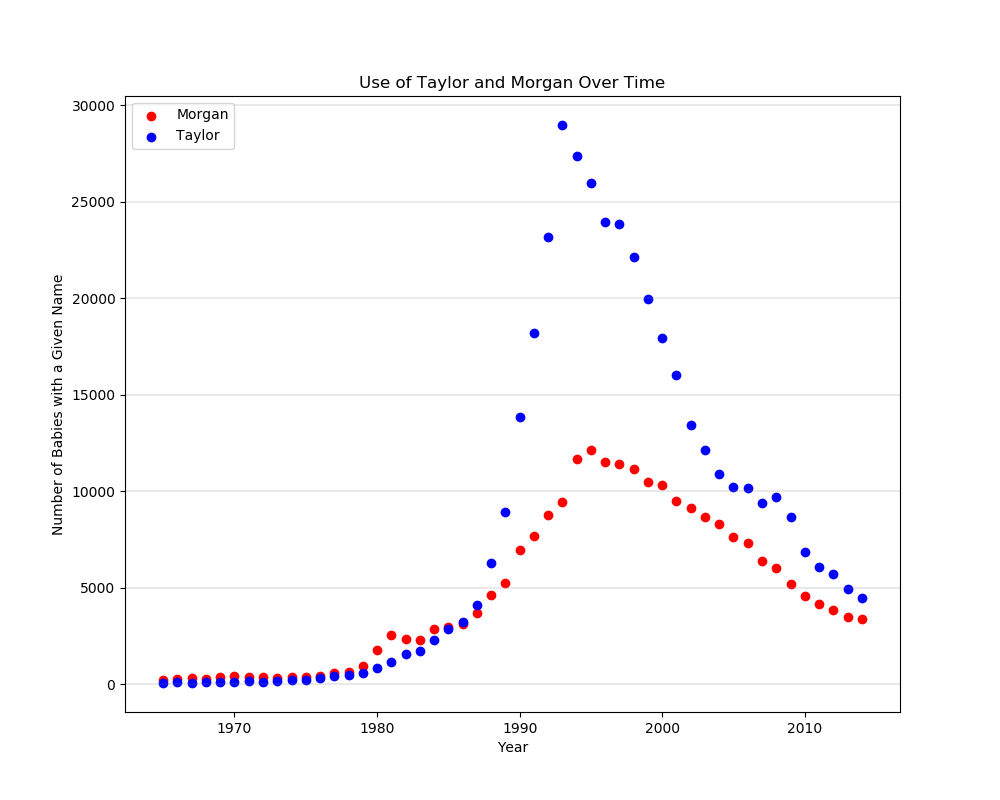

In [98]:
# Let's not forget to set the backend and load matplotlib 
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib

# The fundamental line
fig, ax = plt.subplots(figsize=(10,8))
# Usual settings
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
# Now the scatter plot. The syntax is very similar to the syntax of .plot()
ax.scatter(morgan['Year'], morgan['Total'], color = 'red', label = 'Morgan')
ax.scatter(taylor['Year'], taylor['Total'], color = 'blue', label = 'Taylor')
# Legend and grid
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

The sytnax and final result of `.scatter()` are very similar to the syntax and final result of `.plot()`, which we saw last time. Then, why should you bother about `.scatter()`? Well, scatter plots actually have ways to plot a third variable, while still remaining 2-d plots. So far, we have colored our points to distinguish the Morgan data from the Taylor data. We can use color to specify the proportion of girls among the babies. Alternatively, we can use the dimension of the markers to communicate how many newborns have a certain name. We will do both orderly. 

As a side note, it is possible to use both colors and marker-size to enanche your scatter plot. This way, you could show four dimensions in a single, 2-dimensional plot. This sounds great on paper, but this strategy risks overloading the plot with too much information. 

Let's start with the proportion of girls through colors. We will use the all-important `c` argument of `.scatter()` to provide the proportion-of-girls data. We will also indicate a predifined colormap with the argument `cmap`. You can find a list of all available colormaps in <a href="https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html">the official documentation</a>. However, we will also learn how to construct our own colormap. We will also use different kinds of marker. See <a href="https://matplotlib.org/3.1.1/api/markers_api.html">this documentation page</a> for a complete list of the available markers.

<div class="alert alert-block alert-success">
    <b>Reverse the Colormap</b>: In addition to the colormap shown in <a href="https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html">the official documentation</a>, you can add "_r" to the name of a colormap to obtain its reverse. For example, the original colormap "spring" spans from dark blue to yellow. In the code below, I use the colormap "spring_r", spanning from yellow to blue.
    </div>

<IPython.core.display.Javascript object>


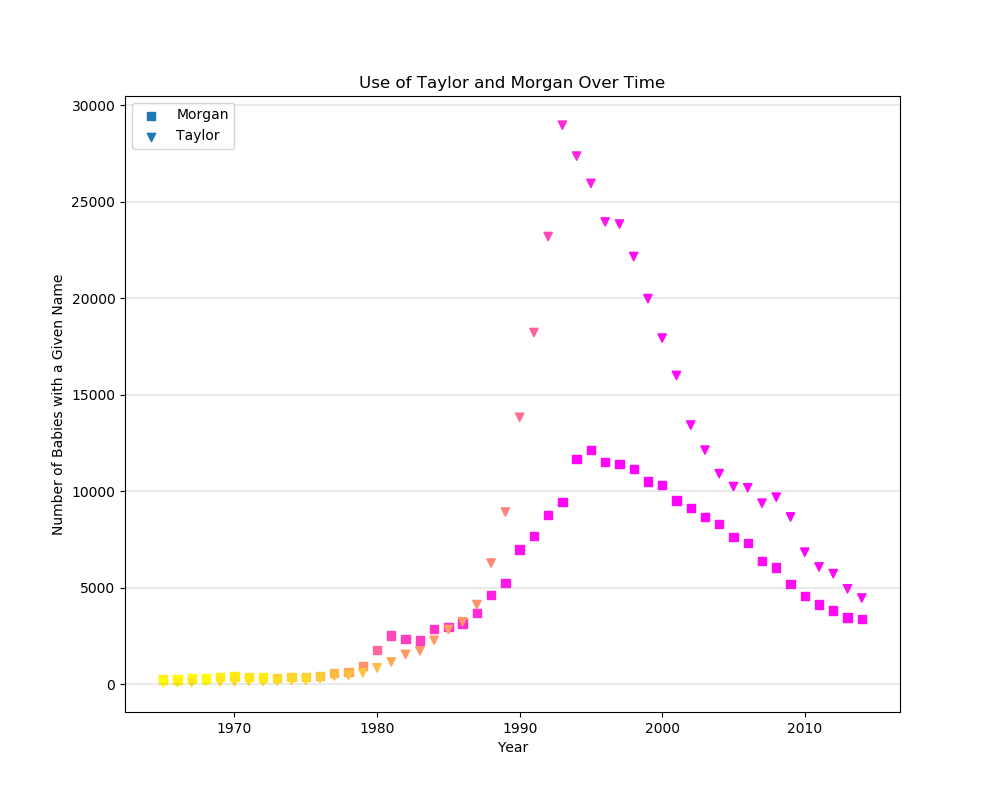

In [129]:
# Same plot as before, but we also need to distinguish the two series of data using different kinds of points.
# The fundamental line
fig, ax = plt.subplots(figsize=(10,8))
# Exactly as before
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
# Now the scatter plot. notice the new arguments:
# marker: what kind of marker the data series uses
# c: color in proportion to a variable
# cmap: what color map to use for c
# We delete the color argument (it is incompatible with the c argument)
ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], label = 'Morgan', marker = 's', cmap='spring_r')
ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], label = 'Taylor', marker = 'v', cmap='spring_r')
# Legend and grid
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

Ok, we will come back to the previous plot in the extra section below -- it is a little more complex, so it is "extra". For the moment, let's focus on the markers' sizes and how to modify them. Here we will use the _s_ argument of `scatterplot()`. However, it makes sense to invert the way the information is presented. On the y-axis we will have the proportion of newborns who are girls. The size of the markers will represent how many newbors are given the name "Morgan" ("Taylor") each year.

<IPython.core.display.Javascript object>


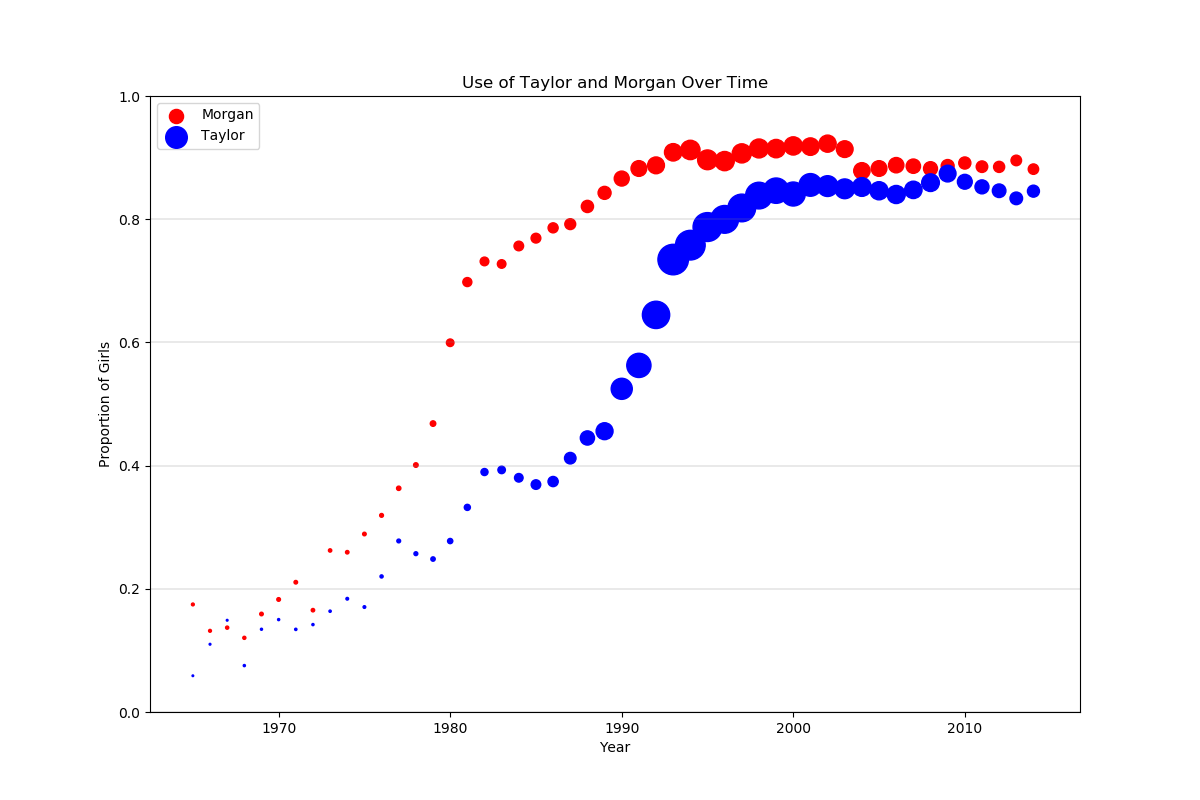

In [183]:
# The usual
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
# Now the change starts
ax.set_ylabel('Proportion of Girls')
ax.set_ylim([0,1])
# Now the scatter plot. notice the new arguments:
# s: size of the marker
ax.scatter(morgan['Year'], morgan['Proportion'], s = morgan['Total']/60, label = 'Morgan', color = 'red')
ax.scatter(taylor['Year'], taylor['Proportion'], s = taylor['Total']/60, label = 'Taylor', color = 'blue')
# ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], label = 'Taylor', marker = 'v', cmap='spring_r')
# # Legend and grid
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

##### Extra: Colorbars, Colormaps and How to Personalize It

One of the plots above used color to show the proportion of girls in each year. However, it is clearly missing something: we need a color scale to tell us what the colors in the plot actually means. Let's introduce a new method of a `Figure`, `.colorbar()`. This method creates a legend for the colorcode you use in an image (or a specific `Artist` within an `Axes`). Unfortunately, the code to use this method is surprisingly complex. In my humble opionion, this is not well documented. Therefore, let's take the time to look at how to do this properly. 

Let's examine the two main arguments that the `.colorbar()` method takes:

- The first argument of `.colorbar()` is an object of the class `matplotlib.cm.ScalarMappable` or an `Artist`. Internally, matplotlib always construct `ScalarMappable` anyway. Let's see what this is about:
  - A `ScalarMappable` maps numerical values to coordinates in the RGBA space. In practice, you input a number and it outputs a color. It has two basic components that you need to specify:
    - First, you need to specify a normalizer. This will be an object of the type `cm.colors.Normalize()`. This object has two main argument, _vmin_ and _vmax_. These arguments specify the lowest (highest) numerical values that you need to map to RGBA coordinates -- they map onto the extremes of your colormap. The `cm.colors.Normalize()` object transforms scalar numbers between _vmin_ and _vmax_ into scalars between 0 and 1 -- as the name suggests, the object actually normalizes the input! 
    - Second, you need to specify a _cmap_. You can both pass your own personalized _cmap_ , or simply a keyword corresponding to the pre-installed color maps in matplotlib.
  - The second main parameter is a `cax`. When you create a `.colorbar()` you need to make room for it -- that is, you need a new `Axes` attached to your original figure. At the same time, you probably need to re-size the extant `Axes`. I show you the way I do this in my code by using the toolkit `axes_grid1`, which is a powerful tool specifically designed to manage `Axes` in a `Figure`.  There are other ways, but, in my own experience, this works wonders.
  
  <div class="alert alert-block alert-success">
    <b>Use Colorbase</b>: In addition to the colormap shown in <a href="https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html">the official documentation</a>, you can add "_r" to the name of a colormap to obtain its reverse. For example, the original colormap "spring" spans from dark blue to yellow. In the code below, I use the colormap "spring_r", spanning from yellow to blue.
    </div>

  <div class="alert alert-block alert-success">
    <b>Different Normalizer</b>: There are many ways to map a range of values to the real numbers between 0 and 1. The cm.colors.Normalize() object described above uses a liner projection. However, one may want to use different, non-linear methods -- such as a logarthmic mapping. <a href="  https://matplotlib.org/3.1.0/tutorials/colors/colormapnorms.html
        ">This tutorial</a> shows you the different possibilities already implemented in matplotlib.
    </div>


<IPython.core.display.Javascript object>


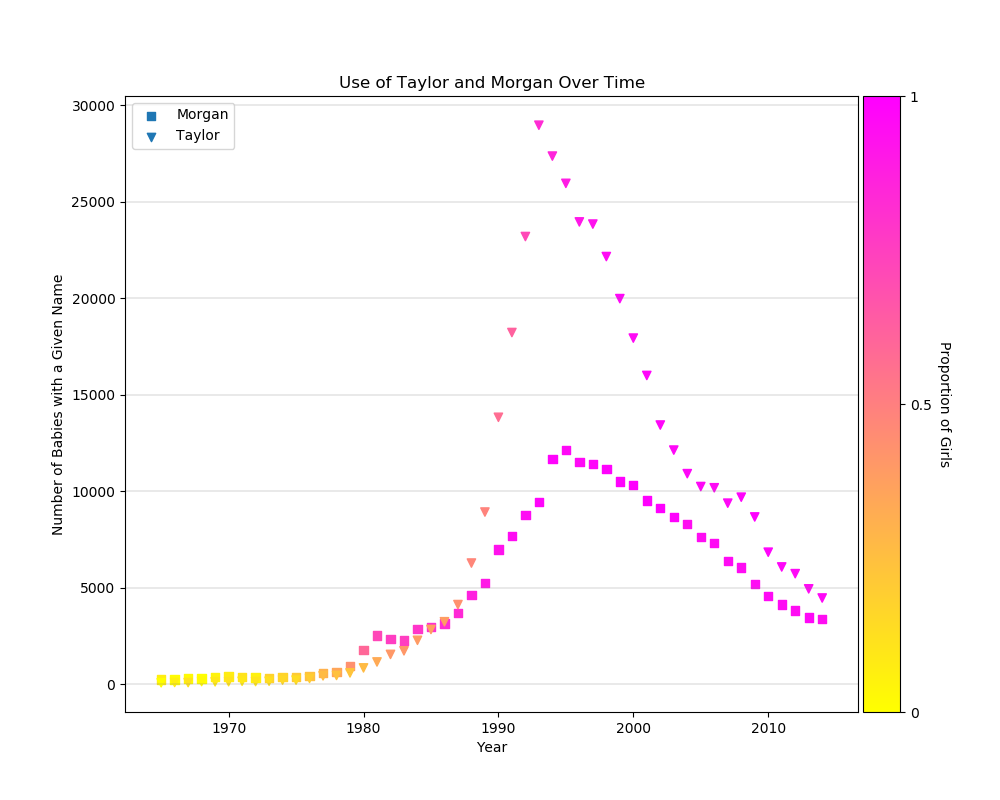

Text(0, 0.5, 'Proportion of Girls')

In [152]:
# The toolkit I mentioned
from mpl_toolkits.axes_grid1 import make_axes_locatable
# This is the complex part We need the submodule cm
from matplotlib import cm
norm=cm.colors.Normalize()

# Same plot as before
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
col_object = ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], label = 'Morgan', marker = 's', cmap='spring_r')
col_object = ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], label = 'Taylor', marker = 'v', cmap='spring_r')
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)
# Create the ScalarMappable object
# In our data, we need to create a colorcode for the proportion of girls
# This will go from 0 (vmin) to 1 (vmax)
norm=cm.colors.Normalize(vmin=0, vmax=1)
scalar_mappable = matplotlib.cm.ScalarMappable(norm, cmap='spring_r')
# Now, create the space for the colorbar
divider = make_axes_locatable(ax)
# This is the key line
# First argument: where the space will be created (on the right)
# size: how much of the original Axes we are using
# pad: distance between the newly-created Axes and the resized Axes 
cax = divider.append_axes('right', size='5%', pad=0.05)
# Finally create the colorbar. We add the orientation keyword (it could be horizontal)
cbar = fig.colorbar(scalar_mappable, cax=cax, orientation='vertical')
# This is a colorbar specific method to set the ticks to appear
cbar.set_ticks([0, 0.5, 1])
# cbar has it own Axes, that can be accessed through cbar.ax.
cbar.ax.set_yticklabels(['0', '0.5', '1'])
# We set the name for the colorbar
# With respect to the axes produced by the fundamental line, this Axes has different default settings
# E.G. the ylabel will appear on the right -- but this is convenient!
cbar.ax.set_ylabel('Proportion of Girls', rotation=-90, verticalalignment="bottom")

This looks better. As a last step, let's create our own colormap. It is traditional (at least in Western societies) to signal a newborn boy with the color blue and a newborn girl with the color pink. Questionable as it may be, this colorscheme will probably be immediately readable by a Western audience. So, let's implement this colorscheme in our own _cmap_ .

Under the hood, a _cmap_ is an object converting values between 0 and 1 to RGBA coordinates. So, when maplotlib passes the normalized data (i.e. from 0 to 1) to a _cmap_, it gets back the RGBA coordinate for each point based on the data the point represents. To create a cmap, we need to invert this operation. That is, we need to specify a way to map number from 0 to 1 to RGBA coordinates. 

We will use the `LinearSegmentedColormap` object to do this. We will use the keyword colors 'lightskyblue' and 'pink' as the extremes of our colormap. Lightskyblue will map to 0 (all newborns with a given name were boys) and pink will map to 1 (all newborns with a given name were girls). In between, we will use a linear interpolation between these two colors -- `LinearSegmentedColormap` does this for us.



<div class="alert alert-block alert-success">
    <b>LinearSegmentedColormap</b>: LinearSegmentedColormap is a powerful, yet complex object. Our case is actually the simplest possible -- we just have specific colors, at the start and the end of the scale. In cases like these, one can use the `.from_list()` method to initialize the colormap -- as shown in the code below. What happens when we want a specific color (say white) in the exact middle of the scale? LinearSegmentedColormap can manage this case, and more complex cases. See <a href="https://matplotlib.org/3.1.0/gallery/color/custom_cmap.html#sphx-glr-gallery-color-custom-cmap-py">this tutorial</a> for a more extensive introduction.
    </div>

<IPython.core.display.Javascript object>


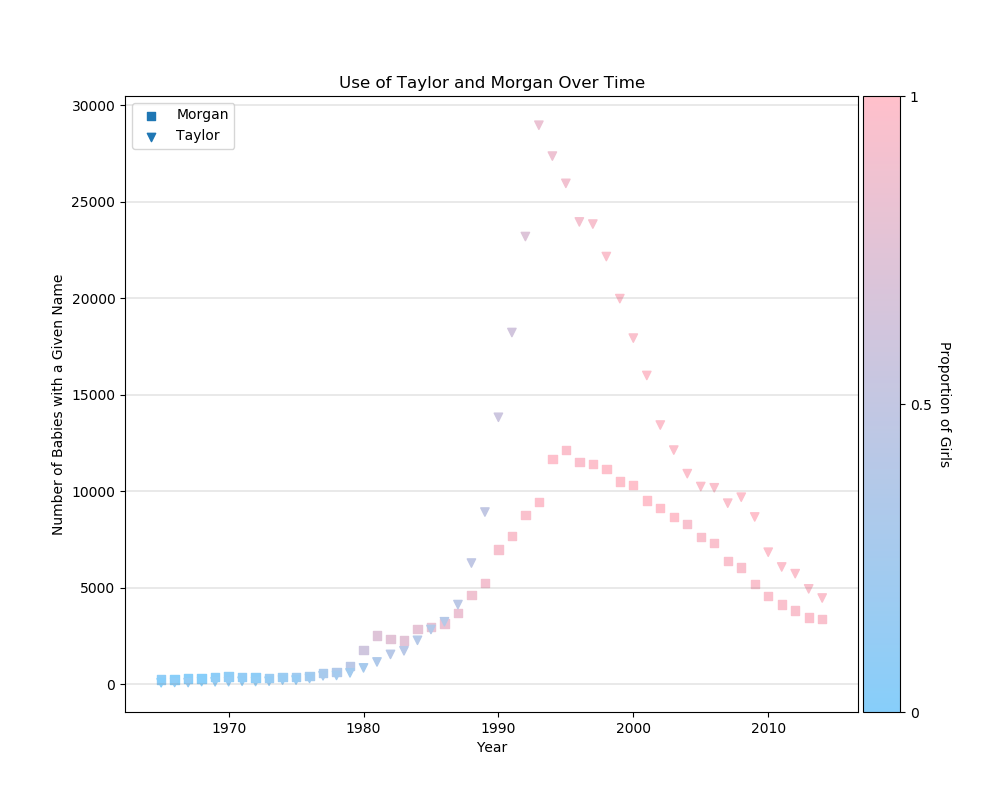

Text(0, 0.5, 'Proportion of Girls')

In [168]:
# Import what we need to create a cmap
from matplotlib.colors import LinearSegmentedColormap
# Create the cmap. We only specify the name and the colors at the extremes
new_cmap = LinearSegmentedColormap.from_list(name = 'new_cmap', colors = ['lightskyblue', 'pink'])
# Now we can use our new cmap. The code is identical to the cell above excpet for the cmap used.
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
col_object = ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], label = 'Morgan', marker = 's', cmap=new_cmap)
col_object = ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], label = 'Taylor', marker = 'v', cmap=new_cmap)
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)
norm=cm.colors.Normalize(vmin=0, vmax=1)
scalar_mappable = matplotlib.cm.ScalarMappable(norm, cmap=new_cmap)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(scalar_mappable, cax=cax, orientation='vertical')
cbar.set_ticks([0, 0.5, 1])
cbar.ax.set_yticklabels(['0', '0.5', '1'])
cbar.ax.set_ylabel('Proportion of Girls', rotation=-90, verticalalignment="bottom")